+ 面试问到了字符编码的转换问题，虽然遇到过，但是并未深入解决，以下是：

In [1]:
import sys
sys.getdefaultencoding()#需要看默认编码方式，不同软件是不同的

'utf-8'

In [2]:
a='文字编码'
type(a)

str

In [3]:
a

'文字编码'

In [6]:
b=a.encode('UTF-8')
print(b)
print(type(b))

b'\xe6\x96\x87\xe5\xad\x97\xe7\xbc\x96\xe7\xa0\x81'
<class 'bytes'>


In [7]:
c=b.decode('UTF-8')
print(c)
print(type(c))

文字编码
<class 'str'>


In [10]:
d=c.encode('gbk')
print(d)
print(type(d))

b'\xce\xc4\xd7\xd6\xb1\xe0\xc2\xeb'
<class 'bytes'>


+ GBK转utf-8

In [9]:
str_1 = b'\xd6\xd0\xce\xc4'
print('“中文”的GBK编码:   ', str_1)

str_2 = str_1.decode('gbk')
print('第一步：用GBK解码：  ', str_2)

str_3 = str_2.encode('utf-8')
print('第二步：用UTF-8编码：', str_3)

“中文”的GBK编码:    b'\xd6\xd0\xce\xc4'
第一步：用GBK解码：   中文
第二步：用UTF-8编码： b'\xe4\xb8\xad\xe6\x96\x87'


在Python 3版本中，把'xxx'和u'xxx'统一成Unicode编码，即写不写前缀u都是一样的。

在Python 3版本中，所有的字符串都是使用Unicode编码的字符串序列。

Python 3最重要的新特性之一是对字符串和二进制数据流做了明确的区分。文本总是 Unicode，由 str 类型表示，二进制数据则由 bytes 类型表示。Python 3 不会以任意隐式的方式混用 str 和 bytes ，你不能拼接字符串和字节流，也无法在字节流里搜索字符串（反之亦然），也不能将字符串传入参数为字节流的函数（反之亦然）。

In [11]:
import sys
 
# 查看默认编码
print(sys.getdefaultencoding())  # utf-8
 
b = b'\xe4\xb8\xad\xe5\x9b\xbd'  # py3定义bytes使用 b = b'dfja'
print(b, type(b))  # b'\xe4\xb8\xad\xe5\x9b\xbd' <class 'bytes'>
b_decode = b.decode('utf-8')
print(b_decode, type(b_decode))  # 中国 <class 'str'>
 
s = '中国'  # Python3中定义的字符串（str）默认就是 unicode字符串
print(s, type(s))  # 中国 <class 'str'>
# s1 = s.decode("utf-8")  # AttributeError: 'str' object has no attribute 'decode' ← Python3中字符串不再有decode方法
 
s2 = s.encode("gbk")  # 将字符串（str）用 “gbk字符编码” 编码为 “gbk字符编码的字节”
print(s2, type(s2))  # b'\xd6\xd0\xb9\xfa' <class 'bytes'>
s22 = s2.decode('gbk')  # 将 “字节串” 用 “gbk字符编码” 解码 为 “字符串（str)”
print(s22, type(s22))  # 中国 <class 'str'>
 
s3 = s.encode("utf-8")
print(s3, type(s3))  # b'\xe4\xb8\xad\xe5\x9b\xbd' <class 'bytes'>
s33 = s.encode("utf-8").decode('utf-8')
print(s33, type(s33))  # 中国 <class 'str'>

utf-8
b'\xe4\xb8\xad\xe5\x9b\xbd' <class 'bytes'>
中国 <class 'str'>
中国 <class 'str'>
b'\xd6\xd0\xb9\xfa' <class 'bytes'>
中国 <class 'str'>
b'\xe4\xb8\xad\xe5\x9b\xbd' <class 'bytes'>
中国 <class 'str'>


来自：https://blog.csdn.net/tz_zs/article/details/79877938

bytes和str之间的异同
回到bytes和str的身上。bytes是一种比特流，它的存在形式是01010001110这种。我们无论是在写代码，还是阅读文章的过程中，肯定不会有人直接阅读这种比特流，它必须有一个编码方式，使得它变成有意义的比特流，而不是一堆晦涩难懂的01组合。因为编码方式的不同，对这个比特流的解读也会不同，对实际使用造成了很大的困扰。下面让我们看看Python是如何处理这一系列编码问题的：

如果，上面的阐述还不能让你搞清楚两者的区别，那么记住下面两几句话：

在将字符串存入磁盘和从磁盘读取字符串的过程中，Python自动地帮你完成了编码和解码的工作，你不需要关心它的过程。

使用bytes类型，实质上是告诉Python，不需要它帮你自动地完成编码和解码的工作，而是用户自己手动进行，并指定编码格式。

Python已经严格区分了bytes和str两种数据类型，你不能在需要bytes类型参数的时候使用str参数，反之亦然。这点在读写磁盘文件时容易碰到。

在bytes和str的互相转换过程中，实际就是编码解码的过程，必须显式地指定编码格式。

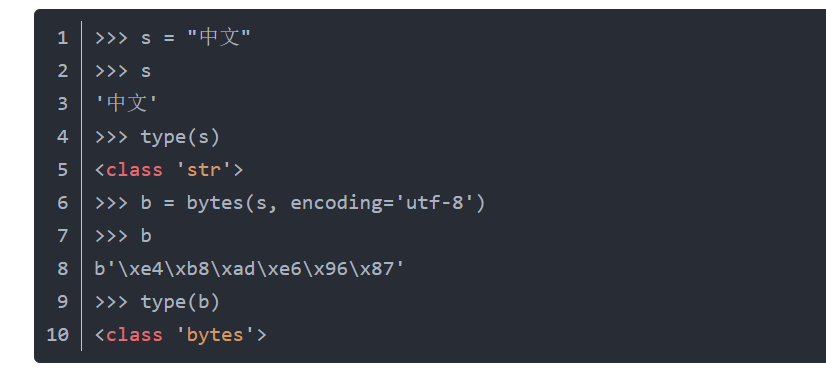

附加说明：

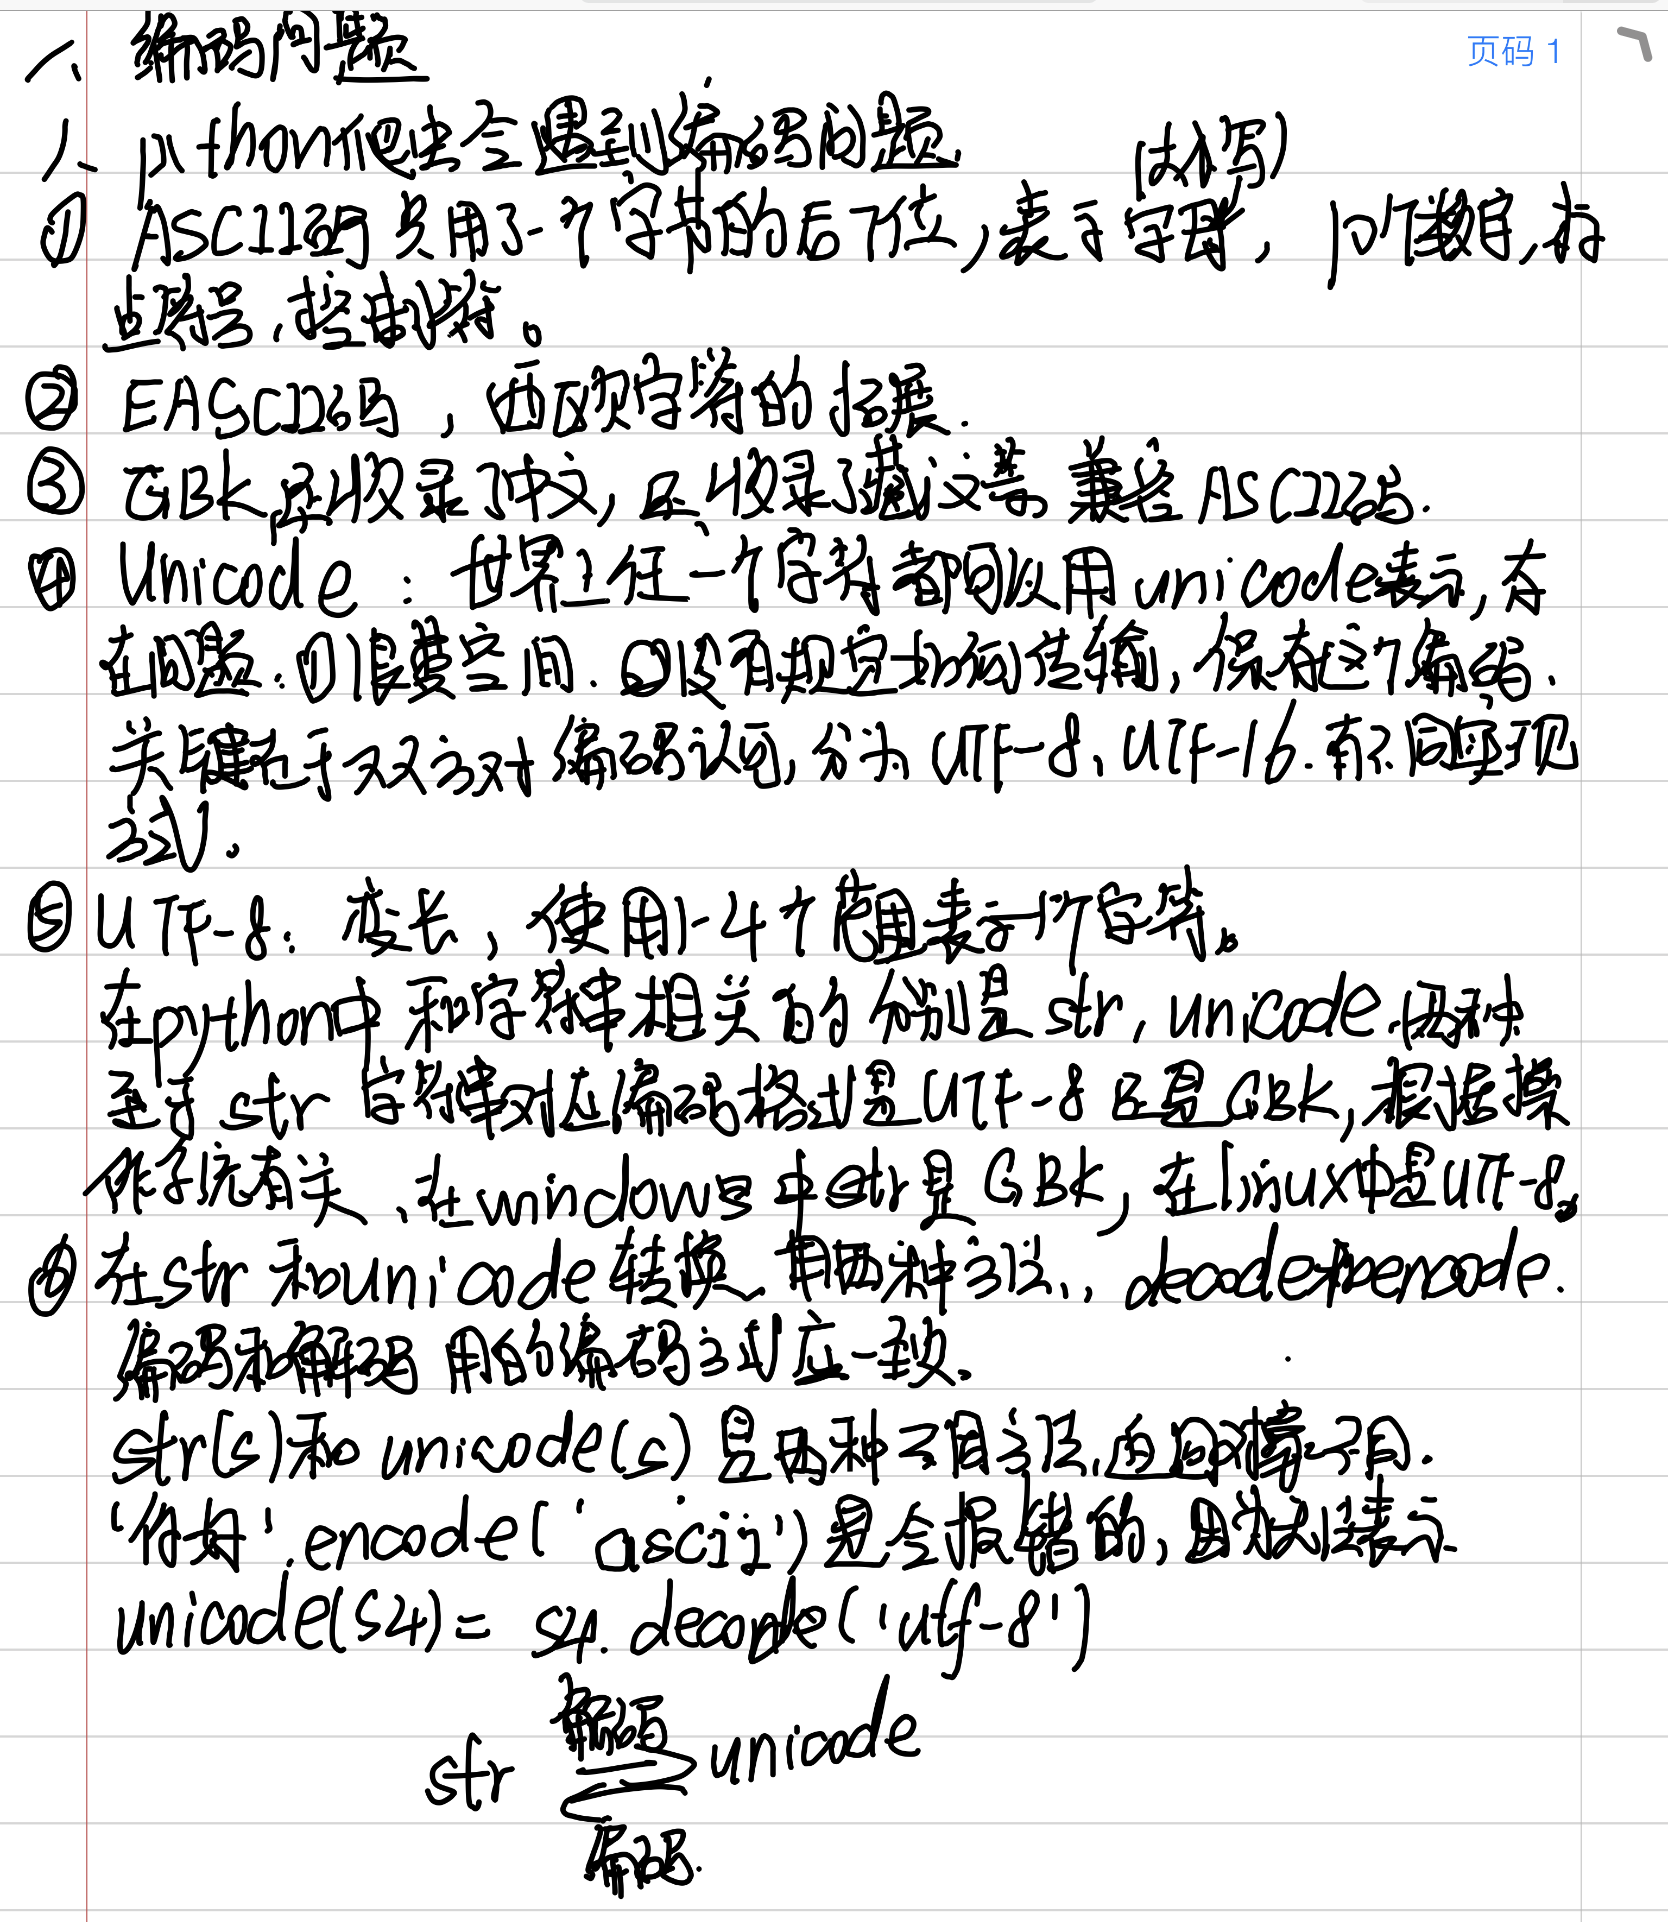